In [1]:
pip install cirq

     |████████████████████████████████| 1.5 MB 1.1 MB/s 
     |████████████████████████████████| 380 kB 6.2 MB/s 
     |████████████████████████████████| 1.3 MB 6.3 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.15.6
    Uninstalling protobuf-3.15.6:
      Successfully uninstalled protobuf-3.15.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ortools 8.2.8710 requires protobuf>=3.14.0, but you have protobuf 3.13.0 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.13.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cirq; print(cirq.google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: cirq.google was used but is deprecated.
 it will be removed in cirq v0.14.
 Use cirq_google instead.

  """Entry point for launching an IPython kernel.


In [3]:
# Example gates
not_gate = cirq.CNOT
pauli_z = cirq.Z

# Using exponentiation to get square root gates
sqrt_x_gate = cirq.X**0.5
sqrt_iswap = cirq.ISWAP**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Example operations
q0, q1 = cirq.LineQubit.range(2)
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = sqrt_iswap(q0, q1)

In [4]:
circuit = cirq.Circuit()
# You can create a circuit by appending to it
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
# All of the gates are put into the same Moment since none overlap
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [5]:
# We can also create a circuit directly as well:
print(cirq.Circuit(cirq.SWAP(q, q+1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [6]:
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)
q2 = cirq.GridQubit(0, 2)
adjacent_op = cirq.CZ(q0, q1)
nonadjacent_op = cirq.CZ(q0, q2)

# This is an unconstrained circuit with no device
free_circuit = cirq.Circuit()
# Both operations are allowed:
free_circuit.append(adjacent_op)
free_circuit.append(nonadjacent_op)
print('Unconstrained device:')
print(free_circuit)
print()

# This is a circuit on the Foxtail device
# only adjacent operations are allowed.
print('Foxtail device:')
foxtail_circuit = cirq.Circuit(device=cirq_google.Foxtail)
foxtail_circuit.append(adjacent_op)
try:
    # Not allowed, will throw exception
    foxtail_circuit.append(nonadjacent_op)
except ValueError as e:
    print('Not allowed. %s' % e)

Unconstrained device:
(0, 0): ───@───@───
           │   │
(0, 1): ───@───┼───
               │
(0, 2): ───────@───

Foxtail device:


NameError: name 'cirq_google' is not defined

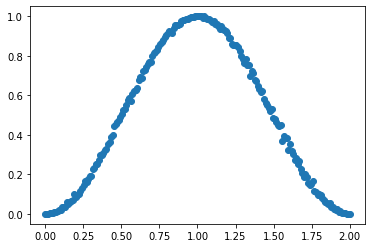

In [7]:
import matplotlib.pyplot as plt
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1,1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'),
                       cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t','p', data={'t': x_data, 'p': y_data})

In [8]:
import numpy as np
# Defines all of the necessary parameters

N = 50    # Defines the total number of steps our walker will take
pr = 0.5  # Defines the probability of our walker stepping to the right
i = 0     # Defines the initial position of our walker

def random_walk(pr, N, i):

    position = i

    # Repeatedly queries our random variable and moves our walker for the specified number of steps

    for j in range(0, N): 

        coin_flip = list(np.random.choice(2, 1, p=[1-pr, pr])) # Flips our weighted coin
        position += 2*coin_flip[0]-1 # Moves our walker according to the coin flip 

    return position

print("The walker is located at: x = {var}".format(var = random_walk(pr, N, i)))

The walker is located at: x = 18


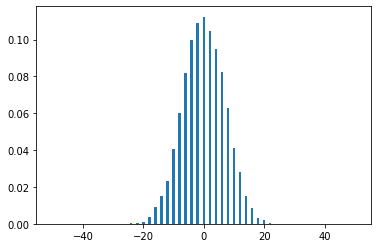

In [9]:
def dist(runs, N):

    positions = range(-1*N, N+1)
    instances = [0 for i in range(-1*N, N+1)]

    for k in range(0, runs):

        result = random_walk(pr, N, i)
        instances[positions.index(result)] += 1

    plt.bar(positions, [n/runs for n in instances])
    plt.show()

dist(10000, N)

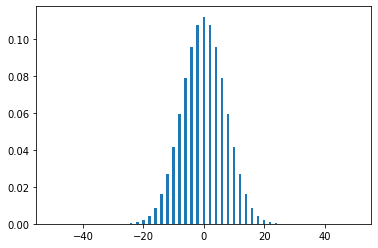

In [10]:
import scipy
def height_calculate(x, N, pr):

    a = (N + x)/2
    b = (N - x)/2

    if (x%2 == 0):
        var = scipy.special.binom(N, a)*(pr**a)*((1-pr)**b)
    else:
        var = 0
    return var

positions = range(-1*N, N+1)
heights = [height_calculate(x, N, pr) for x in positions]
plt.bar(positions, heights)
plt.show()

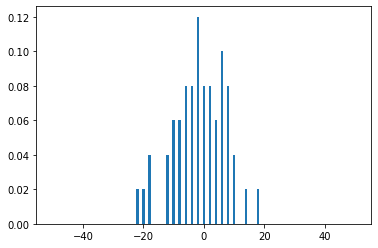

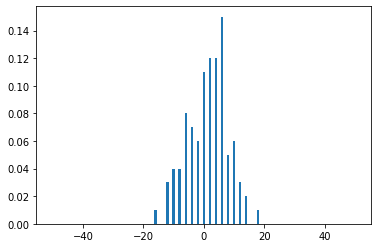

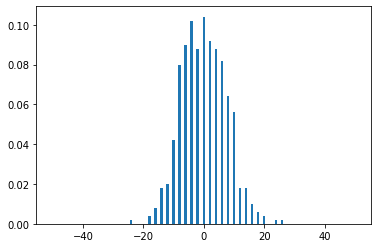

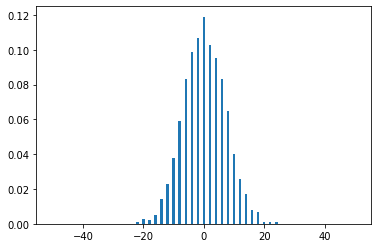

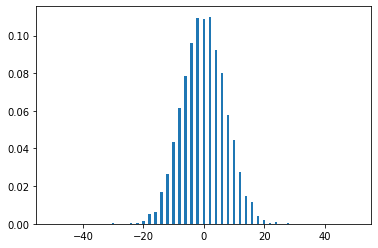

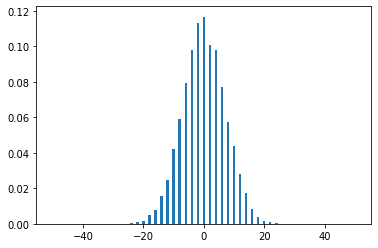

In [11]:
run_range = [50, 100, 500, 1000, 5000, 10000]
for run in run_range:
    dist(run, N)

In [12]:
import fractions
import math
import random

import numpy as np
import sympy
from typing import Callable, List, Optional, Sequence, Union

import cirq

In [13]:
"""Function to compute the elements of Z_n."""
def multiplicative_group(n: int) -> List[int]:
    """Returns the multiplicative group modulo n.

    Args:
        n: Modulus of the multiplicative group.
    """
    assert n > 1
    group = [1]
    for x in range(2, n):
        if math.gcd(x, n) == 1:
            group.append(x)
    return group

In [14]:
"""Example of a multiplicative group."""
n = 15
print(f"The multiplicative group modulo n = {n} is:")
print(multiplicative_group(n))

The multiplicative group modulo n = 15 is:
[1, 2, 4, 7, 8, 11, 13, 14]


In [15]:
"""Function for classically computing the order of an element of Z_n."""
def classical_order_finder(x: int, n: int) -> Optional[int]:
    """Computes smallest positive r such that x**r mod n == 1.

    Args:
        x: Integer whose order is to be computed, must be greater than one
           and belong to the multiplicative group of integers modulo n (which
           consists of positive integers relatively prime to n),
        n: Modulus of the multiplicative group.

    Returns:
        Smallest positive integer r such that x**r == 1 mod n.
        Always succeeds (and hence never returns None).

    Raises:
        ValueError when x is 1 or not an element of the multiplicative
        group of integers modulo n.
    """
    # Make sure x is both valid and in Z_n.
    if x < 2 or x >= n or math.gcd(x, n) > 1:
        raise ValueError(f"Invalid x={x} for modulus n={n}.")

    # Determine the order.
    r, y = 1, x
    while y != 1:
        y = (x * y) % n
        r += 1
    return r

In [16]:
"""Example of (classically) computing the order of an element."""
n = 15  # The multiplicative group is [1, 2, 4, 7, 8, 11, 13, 14].
x = 8
r = classical_order_finder(x, n)

# Check that the order is indeed correct.
print(f"x^r mod n = {x}^{r} mod {n} = {x**r % n}")

x^r mod n = 8^4 mod 15 = 1


In [17]:
"""Example of defining an arithmetic (quantum) operation in Cirq."""
class Adder(cirq.ArithmeticOperation):
    """Quantum addition."""
    def __init__(self, target_register, input_register):
        self.input_register = input_register
        self.target_register = target_register

    def registers(self):
        return self.target_register, self.input_register

    def with_registers(self, *new_registers):
        return Adder(*new_registers)

    def apply(self, target_value, input_value):
        return target_value + input_value

In [18]:
"""Example of using an Adder in a circuit."""
# Two qubit registers.
qreg1 = cirq.LineQubit.range(2)
qreg2 = cirq.LineQubit.range(2, 4)

# Define the circuit.
circ = cirq.Circuit(
    cirq.ops.X.on(qreg1[0]),
    cirq.ops.X.on(qreg2[1]),
    Adder(input_register=qreg1, target_register=qreg2),
    cirq.measure_each(*qreg1),
    cirq.measure_each(*qreg2)
)

# Display it.
print("Circuit:\n")
print(circ)

# Print the measurement outcomes.
print("\n\nMeasurement outcomes:\n")
print(cirq.sample(circ, repetitions=5).data)

Circuit:

0: ───X───#3──────────────────────────────────────────M───
          │
1: ───────#4──────────────────────────────────────────M───
          │
2: ───────<__main__.Adder object at 0x7f33ec833e90>───M───
          │
3: ───X───#2──────────────────────────────────────────M───


Measurement outcomes:

   0  1  2  3
0  1  0  1  1
1  1  0  1  1
2  1  0  1  1
3  1  0  1  1
4  1  0  1  1


In [19]:
"""Example of the unitary of an Adder operation."""
cirq.unitary(
    Adder(target_register=cirq.LineQubit.range(2),
          input_register=1)
).real

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [20]:
"""Defines the modular exponential operation used in Shor's algorithm."""
class ModularExp(cirq.ArithmeticOperation):
    """Quantum modular exponentiation.

    This class represents the unitary which multiplies base raised to exponent
    into the target modulo the given modulus. More precisely, it represents the
    unitary V which computes modular exponentiation x**e mod n:

        V|y⟩|e⟩ = |y * x**e mod n⟩ |e⟩     0 <= y < n
        V|y⟩|e⟩ = |y⟩ |e⟩                  n <= y

    where y is the target register, e is the exponent register, x is the base
    and n is the modulus. Consequently,

        V|y⟩|e⟩ = (U**e|y)|e⟩

    where U is the unitary defined as

        U|y⟩ = |y * x mod n⟩      0 <= y < n
        U|y⟩ = |y⟩                n <= y
    """
    def __init__(
        self, 
        target: Sequence[cirq.Qid],
        exponent: Union[int, Sequence[cirq.Qid]], 
        base: int,
        modulus: int
    ) -> None:
        if len(target) < modulus.bit_length():
            raise ValueError(f'Register with {len(target)} qubits is too small '
                             f'for modulus {modulus}')
        self.target = target
        self.exponent = exponent
        self.base = base
        self.modulus = modulus

    def registers(self) -> Sequence[Union[int, Sequence[cirq.Qid]]]:
        return self.target, self.exponent, self.base, self.modulus

    def with_registers(
            self,
            *new_registers: Union[int, Sequence['cirq.Qid']],
    ) -> cirq.ArithmeticOperation:
        if len(new_registers) != 4:
            raise ValueError(f'Expected 4 registers (target, exponent, base, '
                             f'modulus), but got {len(new_registers)}')
        target, exponent, base, modulus = new_registers
        if not isinstance(target, Sequence):
            raise ValueError(
                f'Target must be a qubit register, got {type(target)}')
        if not isinstance(base, int):
            raise ValueError(
                f'Base must be a classical constant, got {type(base)}')
        if not isinstance(modulus, int):
            raise ValueError(
                f'Modulus must be a classical constant, got {type(modulus)}')
        return ModularExp(target, exponent, base, modulus)

    def apply(self, *register_values: int) -> int:
        assert len(register_values) == 4
        target, exponent, base, modulus = register_values
        if target >= modulus:
            return target
        return (target * base**exponent) % modulus

    def _circuit_diagram_info_(
            self,
            args: cirq.CircuitDiagramInfoArgs,
    ) -> cirq.CircuitDiagramInfo:
        assert args.known_qubits is not None
        wire_symbols: List[str] = []
        t, e = 0, 0
        for qubit in args.known_qubits:
            if qubit in self.target:
                if t == 0:
                    if isinstance(self.exponent, Sequence):
                        e_str = 'e'
                    else:
                        e_str = str(self.exponent)
                    wire_symbols.append(
                        f'ModularExp(t*{self.base}**{e_str} % {self.modulus})')
                else:
                    wire_symbols.append('t' + str(t))
                t += 1
            if isinstance(self.exponent, Sequence) and qubit in self.exponent:
                wire_symbols.append('e' + str(e))
                e += 1
        return cirq.CircuitDiagramInfo(wire_symbols=tuple(wire_symbols))

In [21]:
"""Create the target and exponent registers for phase estimation,
and see the number of qubits needed for Shor's algorithm.
"""
n = 15
L = n.bit_length()

# The target register has L qubits.
target = cirq.LineQubit.range(L)

# The exponent register has 2L + 3 qubits.
exponent = cirq.LineQubit.range(L, 3 * L + 3)

# Display the total number of qubits to factor this n.
print(f"To factor n = {n} which has L = {L} bits, we need 3L + 3 = {3 * L + 3} qubits.")

To factor n = 15 which has L = 4 bits, we need 3L + 3 = 15 qubits.


In [22]:
"""See (part of) the unitary for a modular exponential operation."""
# Pick some element of the multiplicative group modulo n.
x = 5

# Display (part of) the unitary. Uncomment if n is small enough.
# cirq.unitary(ModularExp(target, exponent, x, n))

In [23]:
"""Function to make the quantum circuit for order finding."""
def make_order_finding_circuit(x: int, n: int) -> cirq.Circuit:
    """Returns quantum circuit which computes the order of x modulo n.

    The circuit uses Quantum Phase Estimation to compute an eigenvalue of
    the unitary

        U|y⟩ = |y * x mod n⟩      0 <= y < n
        U|y⟩ = |y⟩                n <= y

    Args:
        x: positive integer whose order modulo n is to be found
        n: modulus relative to which the order of x is to be found

    Returns:
        Quantum circuit for finding the order of x modulo n
    """
    L = n.bit_length()
    target = cirq.LineQubit.range(L)
    exponent = cirq.LineQubit.range(L, 3 * L + 3)
    return cirq.Circuit(
        cirq.X(target[L - 1]),
        cirq.H.on_each(*exponent),
        ModularExp(target, exponent, x, n),
        cirq.qft(*exponent, inverse=True),
        cirq.measure(*exponent, key='exponent'),
    )

In [24]:
"""Example of the quantum circuit for period finding."""
n = 15
x = 7
circuit = make_order_finding_circuit(x, n)
print(circuit)

0: ────────ModularExp(t*7**e % 15)────────────────────────────
           │
1: ────────t1─────────────────────────────────────────────────
           │
2: ────────t2─────────────────────────────────────────────────
           │
3: ────X───t3─────────────────────────────────────────────────
           │
4: ────H───e0────────────────────────qft^-1───M('exponent')───
           │                         │        │
5: ────H───e1────────────────────────#2───────M───────────────
           │                         │        │
6: ────H───e2────────────────────────#3───────M───────────────
           │                         │        │
7: ────H───e3────────────────────────#4───────M───────────────
           │                         │        │
8: ────H───e4────────────────────────#5───────M───────────────
           │                         │        │
9: ────H───e5────────────────────────#6───────M───────────────
           │                         │        │
10: ───H───e6─────────────────

In [25]:
"""Measuring Shor's period finding circuit."""
circuit = make_order_finding_circuit(x=5, n=6)
res = cirq.sample(circuit, repetitions=8)

print("Raw measurements:")
print(res)

print("\nInteger in exponent register:")
print(res.data)

Raw measurements:
exponent=00100111, 00000000, 00000000, 00000000, 00000000, 00000000, 00000000, 00000000, 00000000

Integer in exponent register:
   exponent
0         0
1         0
2       256
3         0
4         0
5       256
6       256
7       256
